**Implementing Recurrent Neural Network (RNN) for Similar Sound Detection**

**Importing necessary Packages**

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init
from scipy.io import wavfile
from google.colab import files
uploaded = files.upload()

Saving bye.wav to bye.wav
Saving hello1.wav to hello1.wav
Saving hello2.wav to hello2.wav


**Initializing Hyperparameters for Recurrent Neural Network (RNN)**

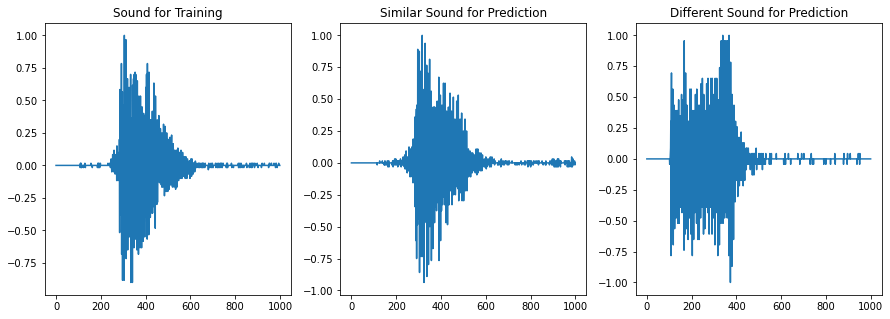

In [2]:
dtype = torch.FloatTensor
input_size, hidden_size, output_size = 21, 20, 1
epochs = 200
seq_length = 1000
lr = 0.1
data_time_steps = np.linspace(0, 1000, seq_length + 1)
fs1, audiodata1 = wavfile.read('hello1.wav')
fs2, audiodata2 = wavfile.read('hello2.wav')
fs3, audiodata3 = wavfile.read('bye.wav')
audiodata1=audiodata1/max(audiodata1)
audiodata2=audiodata2/max(audiodata2)
audiodata3=audiodata3/max(audiodata3)
pl.figure(figsize=(15, 5))
pl.subplot(131)
pl.plot(audiodata1)
pl.title("Sound for Training")
pl.subplot(132)
pl.plot(audiodata2)
pl.title("Similar Sound for Prediction")
pl.subplot(133)
pl.plot(audiodata3)
pl.title("Different Sound for Prediction")
data = np.array(audiodata1)
data.resize((seq_length + 1, 1))
x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

**Initializing weights**

In [3]:
w1 = torch.FloatTensor(input_size, 
hidden_size).type(dtype)
init.normal_(w1, 0.0, 0.3)
w1 = Variable(w1, requires_grad = True)
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal_(w2, 0.0, 0.2)
w2 = Variable(w2, requires_grad = True)

**Function for Feed Forward with Tanh Activation Function**

In [4]:
def forward(input, context_state, w1, w2):
   xh = torch.cat((input, context_state), 1)
   context_state = torch.tanh(xh.mm(w1))
   out = context_state.mm(w2)
   return (out, context_state)

**Training RNN along with calculating Mean Square Errors for each Epoch**

In [5]:
for i in range(epochs):
   total_loss = 0
   context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad = True)
   for j in range(x.size(0)):
      input = x[j:(j+1)]
      target = y[j:(j+1)]
      (pred, context_state) = forward(input, context_state, w1, w2)
      loss = (pred - target).pow(2).sum()/2
      total_loss += loss
      loss.backward()
      w1.data -= lr * w1.grad.data
      w2.data -= lr * w2.grad.data
      w1.grad.data.zero_()
      w2.grad.data.zero_()
      context_state = Variable(context_state.data)
   if i % 10 == 0:
      print("Epoch: {} loss {}".format(i, total_loss.data))

Epoch: 0 loss 6.334072113037109
Epoch: 10 loss 2.5681276321411133
Epoch: 20 loss 2.8014304637908936
Epoch: 30 loss 2.748605728149414
Epoch: 40 loss 2.7618918418884277
Epoch: 50 loss 2.3694117069244385
Epoch: 60 loss 2.71821665763855
Epoch: 70 loss 3.5737226009368896
Epoch: 80 loss 4.002007484436035
Epoch: 90 loss 3.0837745666503906
Epoch: 100 loss 2.4851322174072266
Epoch: 110 loss 3.4163334369659424
Epoch: 120 loss 3.1250526905059814
Epoch: 130 loss 2.8571321964263916
Epoch: 140 loss 2.175628662109375
Epoch: 150 loss 2.237515449523926
Epoch: 160 loss 2.193838357925415
Epoch: 170 loss 1.5771963596343994
Epoch: 180 loss 1.5424433946609497
Epoch: 190 loss 1.4105011224746704


**Prediction with Similar Sound**

In [6]:
context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad = False)
predictions = []
data = np.array(audiodata2)
data.resize((seq_length + 1, 1))
x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)
loss=0
total_loss=0
for i in range(x.size(0)):
   input = x[i:i+1]
   target = y[i:i+1]
   (pred, context_state) = forward(input, context_state, w1, w2)
   context_state = context_state
   loss = (target - pred).pow(2).sum()/2
   total_loss += loss
   predictions.append(pred.data.numpy().ravel()[0])

**Plotting Prediction Results**

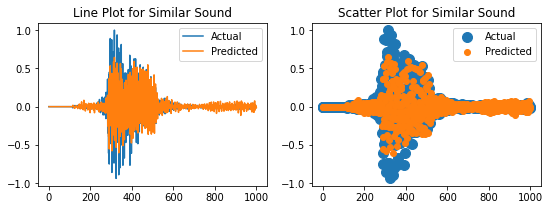

Total loss: 3.4778456687927246


In [7]:
pl.figure(figsize=(9, 3))
pl.subplot(121)
pl.plot(data_time_steps[:-1], x.data.numpy(), label = "Actual")
pl.plot(data_time_steps[1:], predictions, label = "Predicted")
pl.legend()
pl.title("Line Plot for Similar Sound")
pl.subplot(122)
pl.scatter(data_time_steps[:-1], x.data.numpy(), s = 100, label = "Actual")
pl.scatter(data_time_steps[1:], predictions, label = "Predicted")
pl.legend()
pl.title("Scatter Plot for Similar Sound")
pl.show()
print("Total loss: {}".format(total_loss.data))

**Prediction with Different Sound**

In [8]:
context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad = False)
predictions = []
data = np.array(audiodata3)
data.resize((seq_length + 1, 1))
x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)
loss=0
total_loss=0
for i in range(x.size(0)):
   input = x[i:i+1]
   target = y[i:i+1]
   (pred, context_state) = forward(input, context_state, w1, w2)
   context_state = context_state
   loss = (target - pred).pow(2).sum()/2
   total_loss += loss
   predictions.append(pred.data.numpy().ravel()[0])

**Plotting Prediction Results**

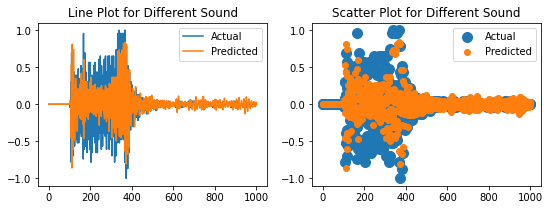

Total loss: 10.021770477294922


In [9]:
pl.figure(figsize=(9, 3))
pl.subplot(121)
pl.plot(data_time_steps[:-1], x.data.numpy(), label = "Actual")
pl.plot(data_time_steps[1:], predictions, label = "Predicted")
pl.legend()
pl.title("Line Plot for Different Sound")
pl.subplot(122)
pl.scatter(data_time_steps[:-1], x.data.numpy(), s = 100, label = "Actual")
pl.scatter(data_time_steps[1:], predictions, label = "Predicted")
pl.legend()
pl.title("Scatter Plot for Different Sound")
pl.show()
print("Total loss: {}".format(total_loss.data))